In [73]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [179]:
def laduj_tylko_punkty(sciezka):
    df = pd.read_csv(sciezka, low_memory=False)
    oceny = [col for col in df.columns if col.startswith("k_")]
    return df.loc[:, oceny]

In [180]:
df = laduj_tylko_punkty("../dane/wyniki/j._polski_podstawowa_2014.csv")

In [186]:
def relabel_pol_q(df):
    
    # we assume that for each variant number of counts is different
    # should work in practice
    counts_of_counts = df.count().value_counts().sort_index(ascending=False)
    count2id = {k: i for i, (k, v) in enumerate(counts_of_counts.items())}
    
    col_groups = [[] for k, v in counts_of_counts.items()]
    for k, v in df.count().items():
        col_groups[count2id[v]].append(k)

    if len(set([len(group) for group in col_groups[1:]])) > 1:
        print("Warning: choosable groups of different length")
        print([len(group) for group in col_groups])
        
    renames = {}
    for group_id, group in enumerate(col_groups):
        for el_id, orig_col in enumerate(group):
            if group_id == 0:
                # common questions
                renames[orig_col] = "co_{}".format(el_id)
            else:
                # choosable variants
                renames[orig_col] = "v{}_{}".format(group_id, el_id)
    
    return df.rename(columns=renames)

In [161]:
renamed_df = relabel_pol_q(df)

In [162]:
renamed_df.count()

co_0     307656
co_1     307656
co_2     307656
co_3     307656
co_4     307656
co_5     307656
co_6     307656
co_7     307656
co_8     307656
co_9     307656
co_10    307656
co_11    307656
co_12    307656
v2_0     117108
v2_1     117108
v2_2     117108
v2_3     117108
v2_4     117108
v2_5     117108
v1_0     189177
v1_1     189177
v1_2     189177
v1_3     189177
v1_4     189177
v1_5     189177
v3_0       1371
v3_1       1371
v3_2       1371
v3_3       1371
v3_4       1371
v3_5       1371
dtype: int64

In [165]:
sumy = df.sum(axis=1).astype(int)

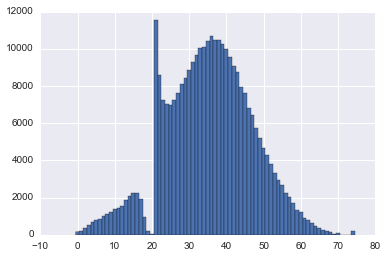

In [166]:
sumy.hist(bins=(sumy.max() + 1), range=(-0.5, sumy.max() + 0.5))

In [98]:
kor = renamed_df.corr()

/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


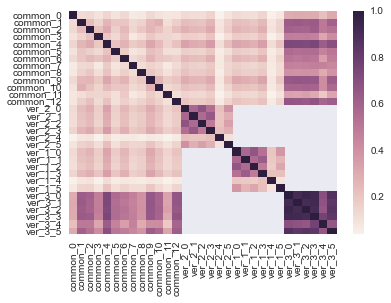

In [99]:
sns.heatmap(kor)

In [167]:
cols_ver2 = [col for col in renamed_df if col.startswith("co")
                                           or col.startswith("v2")]
kor_wariant = renamed_df[cols_ver2].corr()

/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


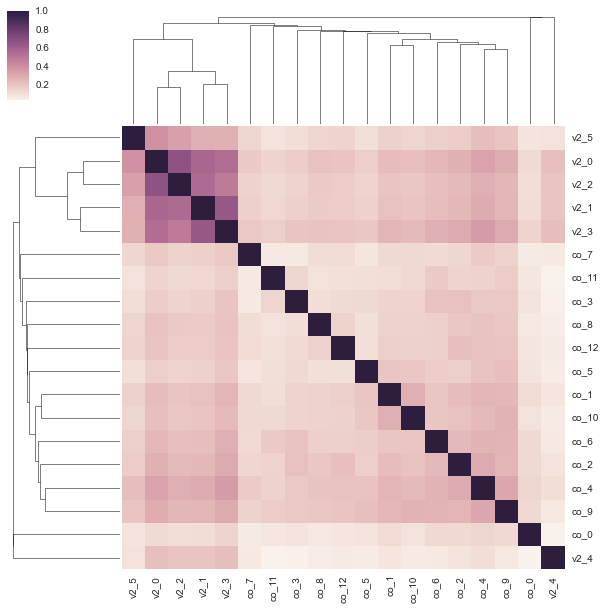

In [168]:
sns.clustermap(kor_wariant)

In [23]:
df_m = laduj_tylko_punkty("../dane/wyniki/matematyka_podstawowa_2014.csv")

/usr/local/lib/python3.4/site-packages/IPython/core/interactiveshell.py:3006: DtypeWarning: Columns (39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


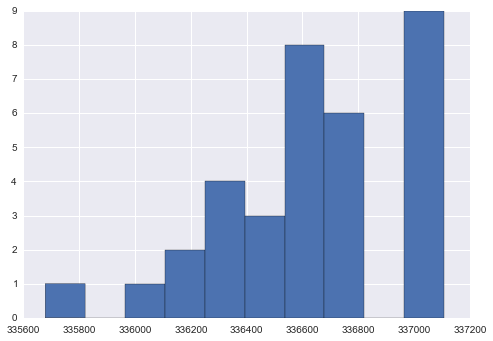

In [24]:
df_m.count().hist()

In [25]:
kor_m = df_m.corr()

/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


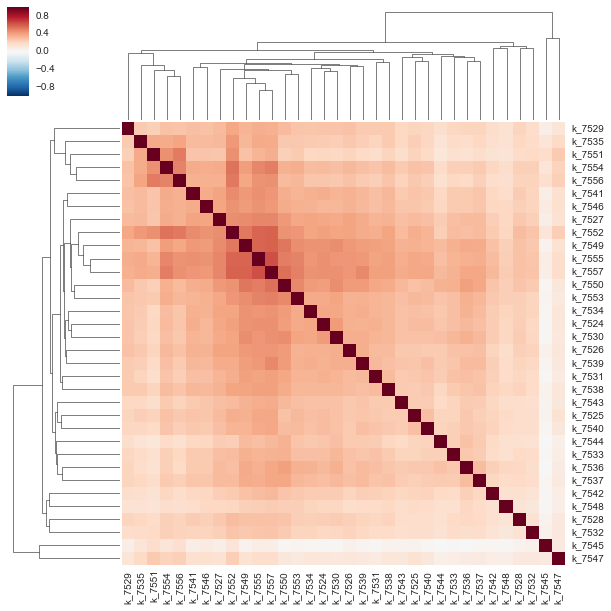

In [26]:
sns.clustermap(kor_m)

In [ ]:
# znow pl

In [36]:
df_p_w2 = df[pd.notnull(df["k_7491"])].loc[:, df.columns[df.count() > 180000]]

In [152]:
z = df_p_w2.cov().values

In [155]:
z.diagonal().sum()

40.297618952574567

In [157]:
covsum = df_p_w2.cov().sum().sum()
ind_sum =  df_p_w2.cov().values.diagonal().sum()
print(covsum)

137.156731976


In [49]:
srednia_p_w2 = df_p_w2.sum(axis=1).mean()
print(srednia_p_w2)

35.4553989121


In [46]:
from scipy import stats
import numpy as np

In [158]:
X = np.linspace(0, sumy_p_w2.max(), 100)
Y = stats.norm.pdf(X, loc=srednia_p_w2, scale=np.sqrt(covsum))
Y2 = stats.norm.pdf(X, loc=srednia_p_w2, scale=np.sqrt(ind_sum))

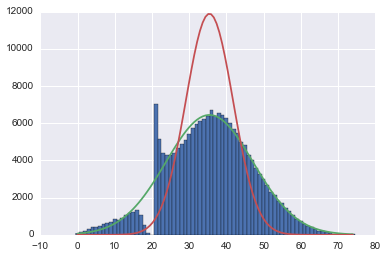

In [159]:
sumy_p_w2 = df_p_w2.sum(axis=1).astype(int)
sumy_p_w2.hist(bins=(sumy_p_w2.max() + 1),
               range=(-0.5, sumy_p_w2.max() + 0.5))
plt.plot(X, Y * len(df_p_w2))
plt.plot(X, Y2 * len(df_p_w2))

In [169]:
def df_one_version(df, ver):
    cols_ver = [col for col in renamed_df if col.startswith("co")
                                           or col.startswith("v" + str(ver))]
    return df[cols_ver].dropna()

In [172]:
df_one_version(renamed_df, 1).count()

co_0     189177
co_1     189177
co_2     189177
co_3     189177
co_4     189177
co_5     189177
co_6     189177
co_7     189177
co_8     189177
co_9     189177
co_10    189177
co_11    189177
co_12    189177
v1_0     189177
v1_1     189177
v1_2     189177
v1_3     189177
v1_4     189177
v1_5     189177
dtype: int64

In [199]:
def plot_gaussian_fit(df_one_ver, naive_comp=False):
    covmat = df_one_ver.cov()
    stdev = np.sqrt(covmat.sum().sum())
    mean = df_one_ver.sum(axis=1).mean()
    
    sums = df_one_ver.sum(axis=1).astype(int)
    sums.hist(bins=(sums.max() + 1),
               range=(-0.5, sums.max() + 0.5))
    X = np.linspace(0, sums.max(), 100)
    plt.plot(X, len(sums) * stats.norm.pdf(X, loc=mean, scale=stdev))
    
    if naive_comp:
        stdev_independent = np.sqrt(covmat.values.diagonal().sum())
        plt.plot(X, len(sums) * stats.norm.pdf(X, loc=mean, scale=stdev_independent))

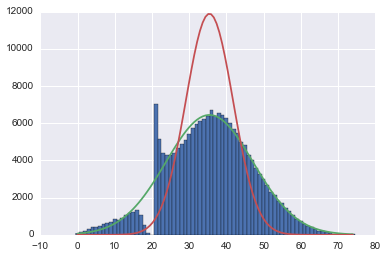

In [194]:
plot_gaussian_fit(df_one_version(renamed_df, 1), naive_comp=True)

In [177]:
def gaussian_fit_year(year):
    df = laduj_tylko_punkty("../dane/wyniki/j._polski_podstawowa_{}.csv".format(year))
    df = relabel_pol_q(df)
    df = df_one_version(df, 1)  # the most numerous variant
    plot_gaussian_fit(df)

2010


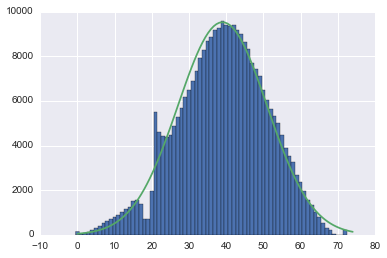

2011


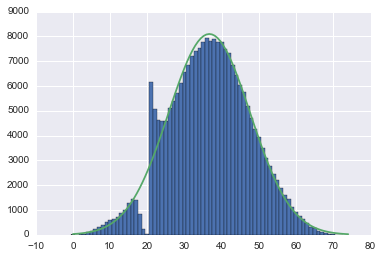

2012


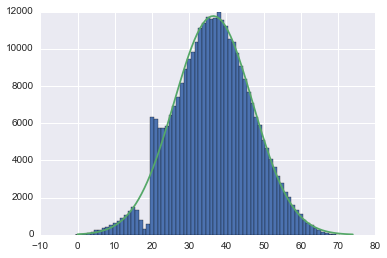

2013


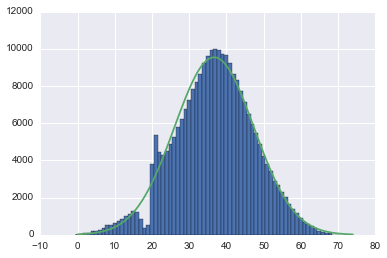

2014


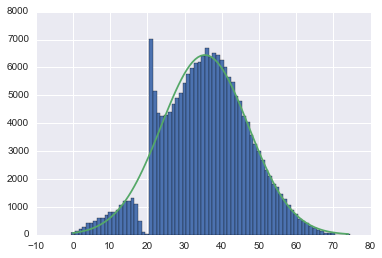

In [195]:
for year in range(2010, 2015):
    print(year)
    gaussian_fit_year(year)
    plt.show()

In [189]:
def gaussian_interference_year(year):
    df = laduj_tylko_punkty("../dane/wyniki/j._polski_podstawowa_{}.csv".format(year))
    df = relabel_pol_q(df)
    df = df_one_version(df, 1)  # the most numerous variant
    plot_gaussian_fit(df[[col for col in df if col.startswith("co")]])
    plt.show()
    plot_gaussian_fit(df[[col for col in df if col.startswith("v")]])
    plt.show()

2010


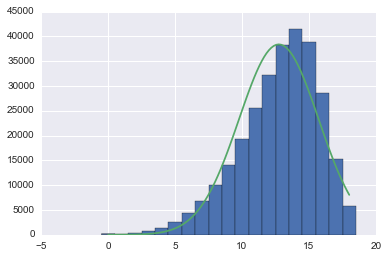

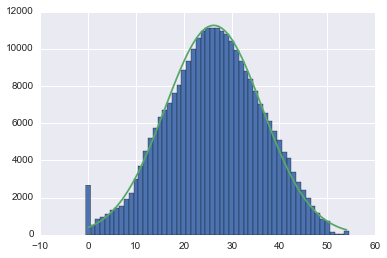

2011


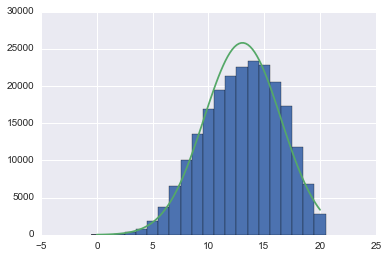

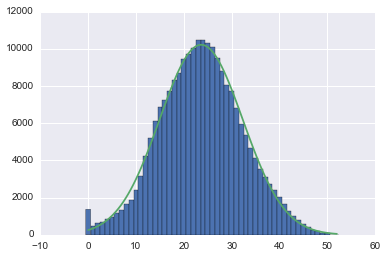

2012


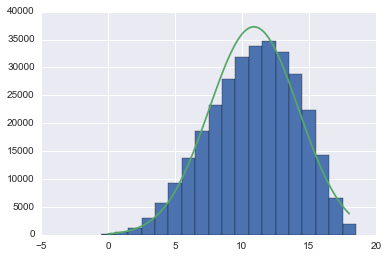

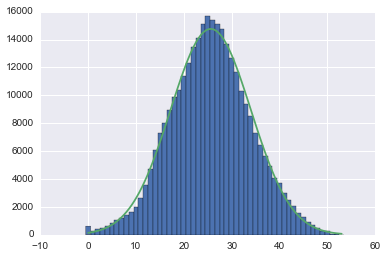

2013


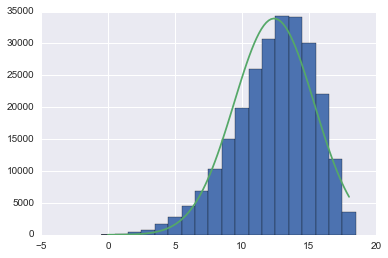

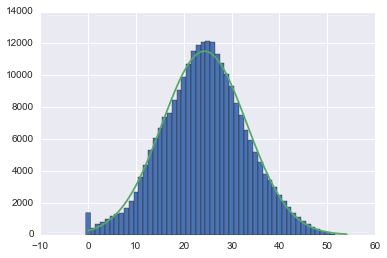

2014


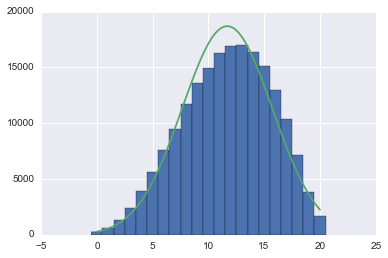

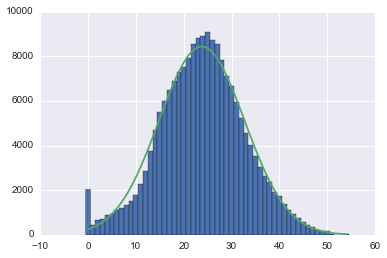

In [200]:
for year in range(2010, 2015):
    print(year)
    gaussian_interference_year(year)
    plt.show()